# D78-1
* **請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練**

In [1]:
!nvidia-smi

Tue Jul 16 20:11:27 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.130                Driver Version: 384.130                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 950M    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0    N/A /  N/A |    466MiB /  2002MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [23]:
import os
import keras
from sklearn.preprocessing import MinMaxScaler

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "GeForce GTX 950M"

In [24]:
train, test = keras.datasets.cifar10.load_data()

In [27]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255
    if flatten:
        x = x.reshape((len(x), -1))
        
    MM = MinMaxScaler()
    x = MM.fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [28]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [31]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

W0716 20:19:16.684058 140415685023488 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 20:19:16.947276 140415685023488 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 20:19:17.113875 140415685023488 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [32]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [33]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 20:19:28.555568 140415685023488 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 20:19:28.582500 140415685023488 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [34]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 20:19:31.255907 140415685023488 deprecation.py:323] From /home/rex/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 20:19:31.300388 140415685023488 deprecation_wrapper.py:119] From /home/rex/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 149us/step - loss: 1.9333 - acc: 0.3027 - val_loss: 1.8524 - val_acc: 0.3428
Epoch 2/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.7209 - acc: 0.3823 - val_loss: 1.6992 - val_acc: 0.4033
Epoch 3/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.6310 - acc: 0.4191 - val_loss: 1.5775 - val_acc: 0.4374
Epoch 4/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.5478 - acc: 0.4474 - val_loss: 1.5489 - val_acc: 0.4488
Epoch 5/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.5095 - acc: 0.4617 - val_loss: 1.5202 - val_acc: 0.4563
Epoch 6/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.4808 - acc: 0.4712 - val_loss: 1.5168 - val_acc: 0.4579
Epoch 7/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.4322 - acc: 0.4909 - val_loss: 1.

50000/50000 [==============================] - 6s 120us/step - loss: 0.5374 - acc: 0.8077 - val_loss: 1.9603 - val_acc: 0.5228
Epoch 60/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.5270 - acc: 0.8117 - val_loss: 2.0392 - val_acc: 0.5148
Epoch 61/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.5268 - acc: 0.8119 - val_loss: 2.0475 - val_acc: 0.5200
Epoch 62/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5183 - acc: 0.8143 - val_loss: 2.0533 - val_acc: 0.5142
Epoch 63/100
50000/50000 [==============================] - 6s 130us/step - loss: 0.5059 - acc: 0.8182 - val_loss: 2.1135 - val_acc: 0.5116
Epoch 64/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.4893 - acc: 0.8251 - val_loss: 2.1326 - val_acc: 0.5113
Epoch 65/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.4890 - acc: 0.8246 - val_loss: 2.1627 - val_acc: 0.5163
Epoch 66/100
50000/50000 [=======

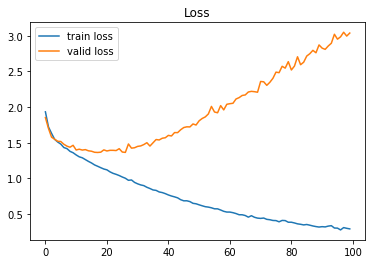

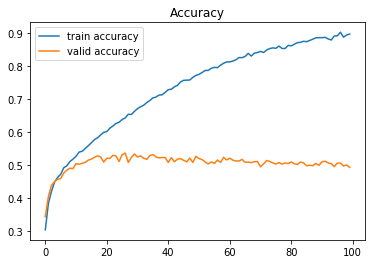

In [36]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# D78-2
* **請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢**

In [37]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170       
Total para

In [38]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [39]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [40]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 68us/step - loss: 2.0851 - acc: 0.2299 - val_loss: 1.8899 - val_acc: 0.3204
Epoch 2/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.8520 - acc: 0.3327 - val_loss: 1.7977 - val_acc: 0.3507
Epoch 3/100
50000/50000 [==============================] - 3s 68us/step - loss: 1.7559 - acc: 0.3678 - val_loss: 1.7246 - val_acc: 0.3759
Epoch 4/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.6874 - acc: 0.3946 - val_loss: 1.6761 - val_acc: 0.3988
Epoch 5/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.6417 - acc: 0.4109 - val_loss: 1.6532 - val_acc: 0.3997
Epoch 6/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.5970 - acc: 0.4245 - val_loss: 1.6158 - val_acc: 0.4197
Epoch 7/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.5685 - acc: 0.4358 - val_loss: 1.5985 - 

50000/50000 [==============================] - 3s 70us/step - loss: 0.9445 - acc: 0.6593 - val_loss: 1.5156 - val_acc: 0.5180
Epoch 60/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.9342 - acc: 0.6641 - val_loss: 1.5244 - val_acc: 0.5089
Epoch 61/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.9284 - acc: 0.6671 - val_loss: 1.5447 - val_acc: 0.5098
Epoch 62/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.9171 - acc: 0.6695 - val_loss: 1.5502 - val_acc: 0.5143
Epoch 63/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.9164 - acc: 0.6706 - val_loss: 1.5577 - val_acc: 0.5078
Epoch 64/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.9051 - acc: 0.6745 - val_loss: 1.5263 - val_acc: 0.5158
Epoch 65/100
50000/50000 [==============================] - 4s 72us/step - loss: 0.9063 - acc: 0.6730 - val_loss: 1.5740 - val_acc: 0.5105
Epoch 66/100
50000/50000 [==============

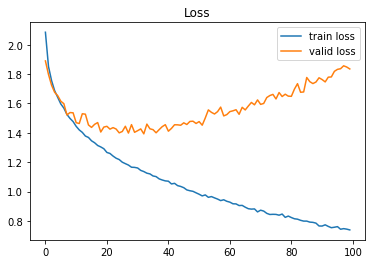

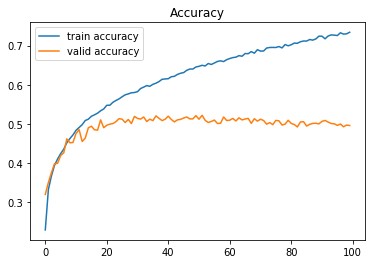

In [41]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()